# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

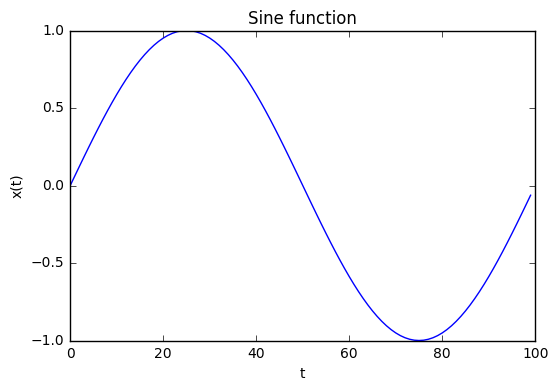

In [60]:
t = np.arange(0.000, 1, 0.01)
f0 = 1
phi = 0
A = 1
x = A * np.sin(2 * np.pi * f0 * t)
plt.plot(x)
plt.title('Sine function')
plt.ylabel('x(t)')
plt.xlabel('t')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

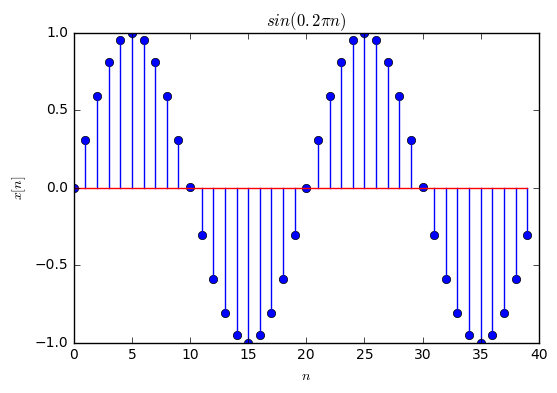

In [65]:
n=np.arange(0,40,1)
s=np.sin(0.1*np.pi*n)   #2pi*1/20t
plt.figure
plt.stem(s)
plt.title('$sin(0.2 \pi n)$')
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

We check our input


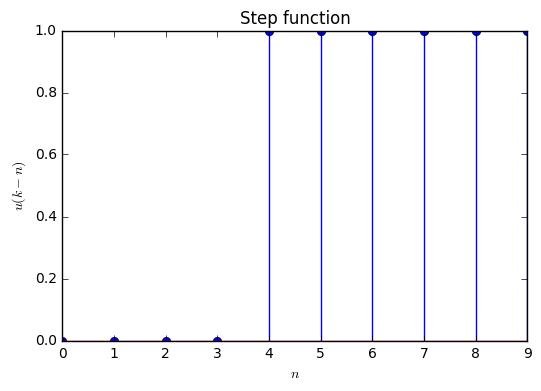

we have a peak at 3 (before the input!!)  that means it is not causal
the first value is tha half because it is the average of two (divided by 2)


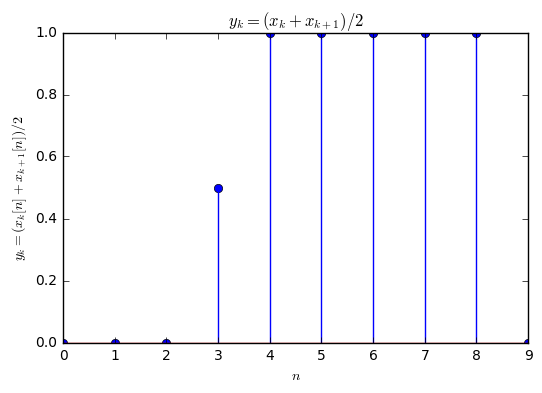

In [72]:
#this is our step function defined in lab1
def step(n=4, N=10):
    if n>N-1:
        raise ValueError('n should be inferior to N-1')
        #create the array
    s=np.zeros((N,))
        #place the Dirac
    s[n:N]=1
    return s

print ('We check our input')

plt.figure
plt.stem(step(4))
plt.xlabel(r'$n$')
plt.ylabel(r'$u(k-n)$')
plt.title('Step function')
plt.show()
N=10

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(s[i]+s[i+1])/2

print ('we have a peak at 3 (before the input!!)  that means it is not causal')
print ('the first value is the half because it is the average of two (divided by 2)')
plt.figure
plt.stem(y)
plt.title('$y_k = (x_k + x_{k+1})/2$')
plt.ylabel(r'$y_k = (x_k[n] + x_{k+1}[n])/2$')
plt.xlabel(r'$n$')
plt.show()

**1.2** Propose a modification to obtain a causal version

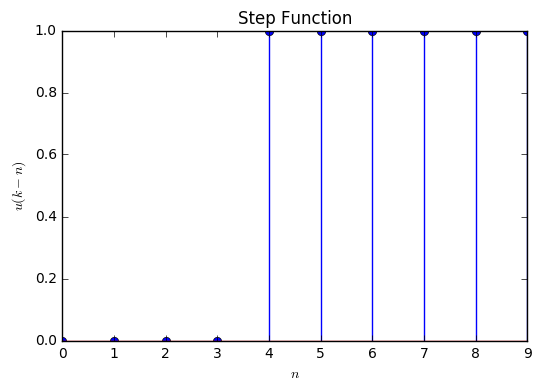

Now this system is causal
the first value is the half because it is the average of two (divided by 2)


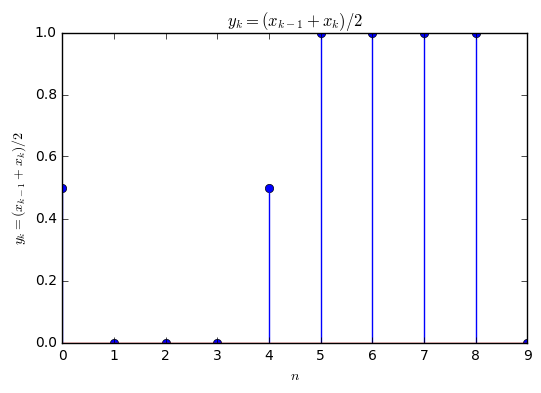

In [78]:
plt.figure
plt.stem(step(4))
plt.xlabel(r'$n$')
plt.ylabel(r'$u(k-n)$')
plt.title('Step Function')
plt.show()
N=10

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(s[i-1]+s[i])/2

print ('Now this system is causal')
print ('the first value is the half because it is the average of two (divided by 2)')
plt.figure
plt.stem(y)
plt.title('$y_k = (x_{k-1} + x_{k})/2$')
plt.ylabel('$y_k = (x_{k-1} + x_{k})/2$')
plt.xlabel('$n$')
plt.show()

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [13]:
def prim(f):
    Fk = np.zeros((N,))
    for i in range (1,N):
        f[i]=(f[i-1]+f[i])
    Fk = f
    return Fk
    


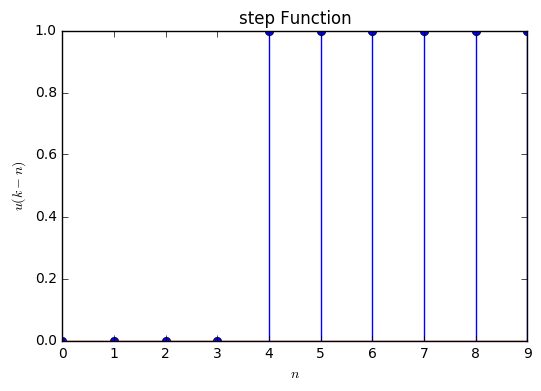

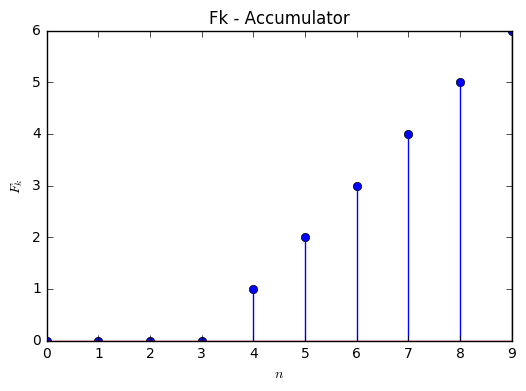

DISCUSS: so as we see, if we input a step the response is unstable
This is because the integral of the step is the ramp, and it is continously increasing
It is also causal


In [85]:
y=np.zeros((N,))
k=4
N=10
s[k:N]=1   #you can just make a step this way, it-s easier!!
plt.figure
plt.stem(s)
plt.title('step Function')
plt.ylabel('$u(k-n)$')
plt.xlabel('$n$')
plt.show()

Fk=prim(s)
plt.figure
plt.stem(Fk)
plt.title('Fk - Accumulator')
plt.ylabel('$F_k$')
plt.xlabel('$n$')
plt.show()

print ('DISCUSS: so as we see, if we input a step the response is unstable')
print ('This is because the integral of the step is the ramp, and it is continously increasing')
print ('It is also causal')

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

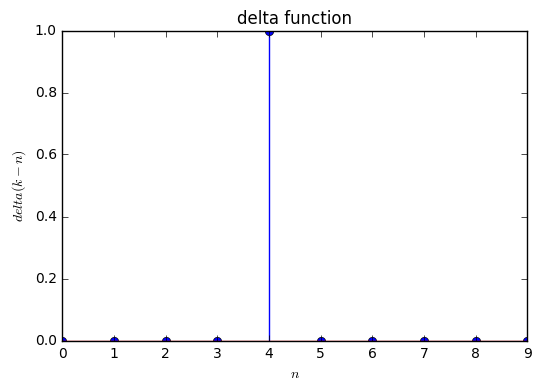

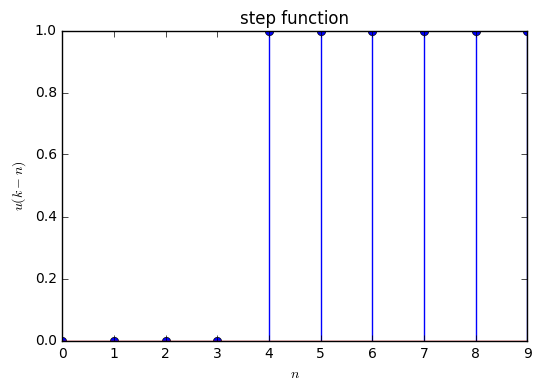

DISCUSS: Now, if we input a delta function, the response is stable, as the integral of a delta is a step
Not like the previous one
It is also causal


In [95]:
delta=np.zeros((N,))
k=4
N=10
delta[4]=1
plt.figure
plt.stem(delta)
plt.title('delta function')
plt.ylabel('$delta(k-n)$')
plt.xlabel('$n$')
plt.show()

Fk=prim(delta)
plt.figure
plt.stem(Fk)
plt.title('step function')
plt.ylabel('$u(k-n)$')
plt.xlabel('$n$')
plt.show()

print ('DISCUSS: Now, if we input a delta function, the response is stable, as the integral of a delta is a step')
print ('Not like the previous one')
print ('It is also causal')

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

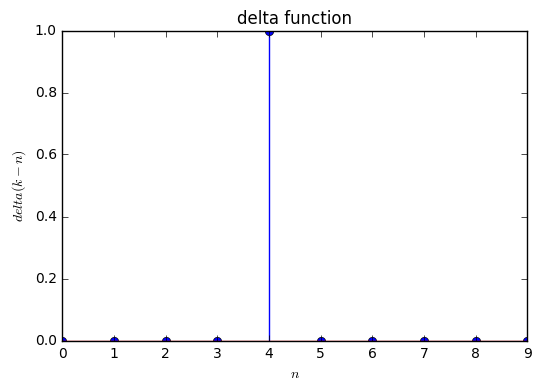

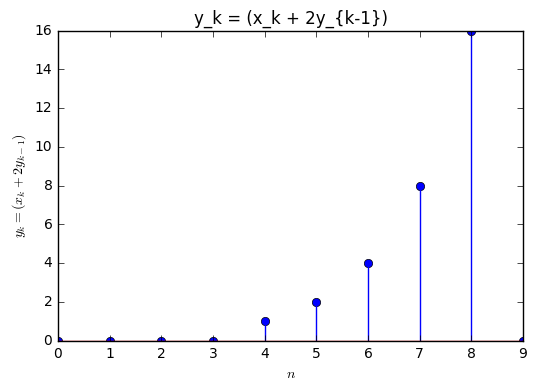

DISCUSS: Now, if we input a delta function, the response is UNSTABLE, as it is an increasing exponential (unbounded)
It is also causal


In [96]:
delta=np.zeros((N,))
k=4
N=10
delta[4]=1
plt.figure
plt.stem(delta)
plt.title('delta function')
plt.ylabel('$delta(k-n)$')
plt.xlabel('$n$')
plt.show()

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
#s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(delta[i]+2*y[i-1])

plt.figure
plt.stem(y)
plt.title('y_k = (x_k + 2y_{k-1})')
plt.ylabel('$y_k = (x_k + 2y_{k-1})$')
plt.xlabel('$n$')
plt.show()

print ('DISCUSS: Now, if we input a delta function, the response is UNSTABLE, as it is an increasing exponential (unbounded)')
print ('It is also causal')

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

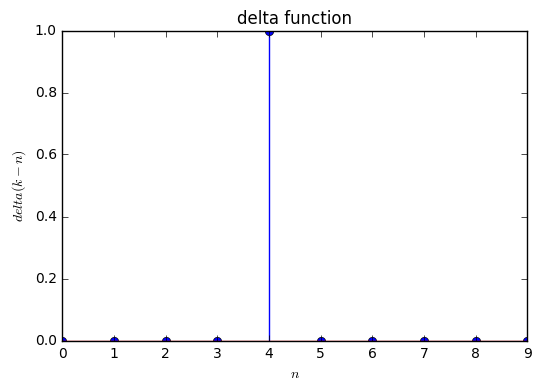

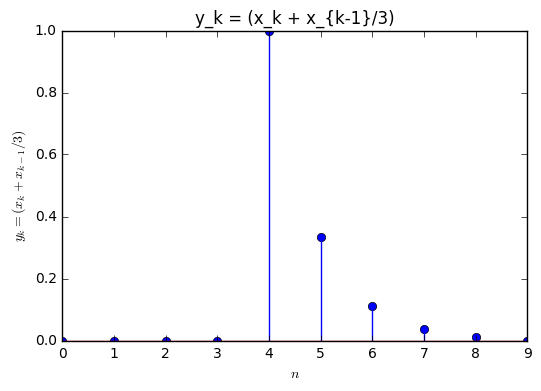

DISCUSS: Now it is stable! We see in the response that is is a decreasing exponential, so it is bounded.
It is also causal


In [97]:
delta=np.zeros((N,))
k=4
N=10
delta[4]=1
plt.figure
plt.stem(delta)
plt.title('delta function')
plt.ylabel('$delta(k-n)$')
plt.xlabel('$n$')
plt.show()

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
#s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(delta[i]+y[i-1]/3)

plt.figure
plt.stem(y)
plt.title('y_k = (x_k + x_{k-1}/3)')
plt.ylabel('$y_k = (x_k + x_{k-1}/3)$')
plt.xlabel('$n$')
plt.show()

print ('DISCUSS: Now it is stable! We see in the response that is is a decreasing exponential, so it is bounded.')
print ('It is also causal')

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


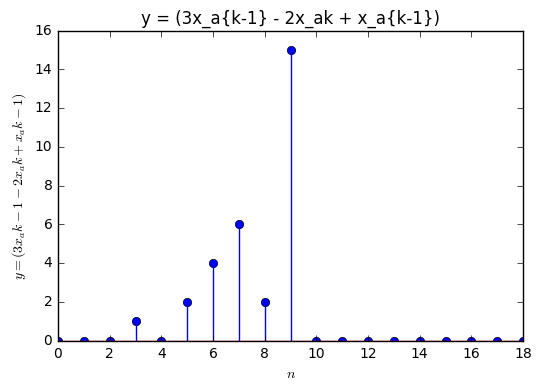

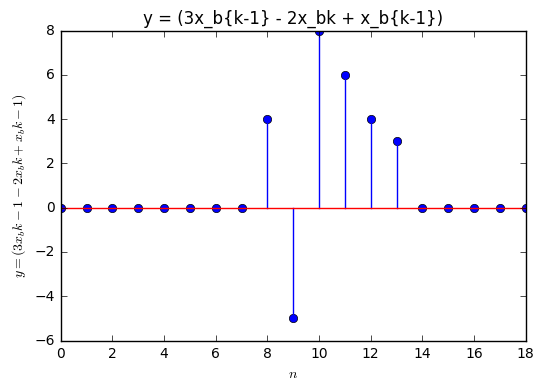

In [101]:
xa = [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xb = [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
N=19
ya=np.zeros((N,))
for i in range (0,N-1):
    ya[i]=(3*xa[i-1] - 2*xa[i] + xa[i+1])

yb=np.zeros((N,))
for i in range (0,N-1):
    yb[i]=(3*xb[i-1] - 2*xb[i] + xb[i+1])

plt.figure
plt.stem(ya)
plt.title('y = (3x_a{k-1} - 2x_ak + x_a{k-1})')
plt.xlabel('$n$')
plt.ylabel('$y = (3x_a{k-1} - 2x_ak + x_a{k-1})$')
plt.show()

plt.figure
plt.stem(yb)
plt.title('y = (3x_b{k-1} - 2x_bk + x_b{k-1})')
plt.xlabel('$n$')
plt.ylabel('$y = (3x_b{k-1} - 2x_bk + x_b{k-1})$')
plt.show()

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


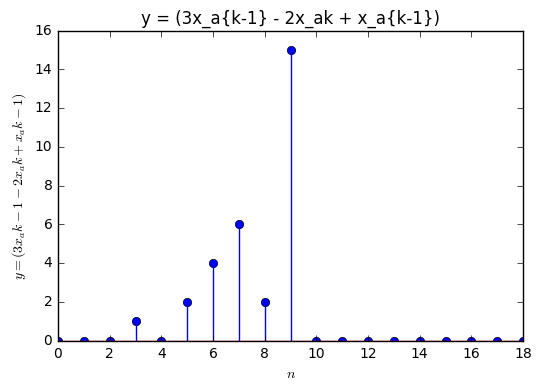

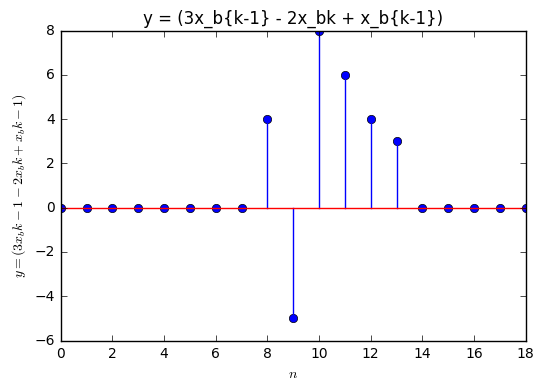

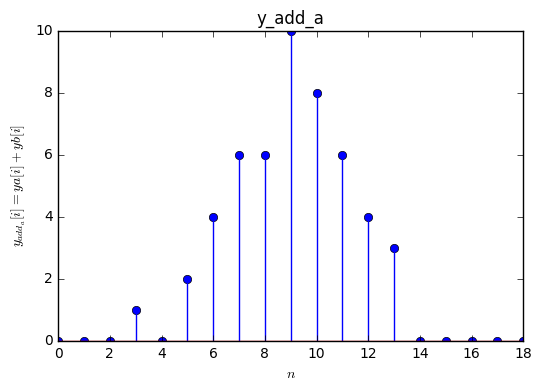

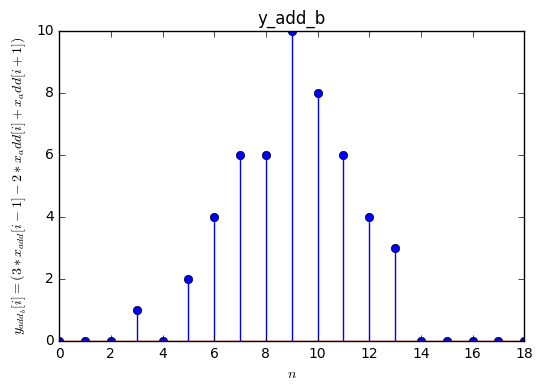

As we see, y_add_a is the same as y_add_b.
So we prove that x3(t)=x1(t)+x2(t) -> y3(t)=y1(t)+y2(t).
Explanation: For each x we have got an y. If we add these two: ya+yb=yadd.
             For being linear, if we add both x : xa+xb=xadd and
             then applying the equation for xadd, we get yadd.


Now to be invariant, we have to prove that for a shifted input, we have an equally shifted output:
So we will shift 2 positions our function (xadd(k-2)) and see what happens at the output.


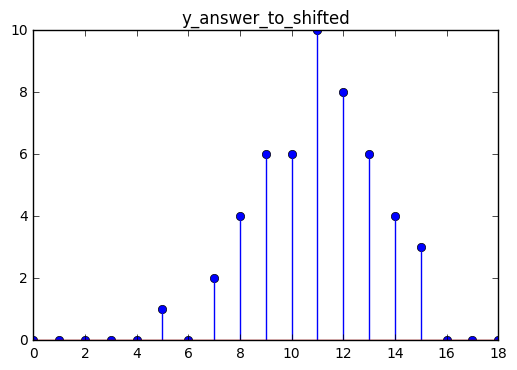

As we see, for a shifted input we have got a shifted output.


We can now conclude that the function y=3x{k−1}−2x{k}+x{k+1} is linear and invariant.




In [110]:
xa = [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xb = [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0]

N=19
ya=np.zeros((N,))
for i in range (0,N-1):
    ya[i]=(3*xa[i-1] - 2*xa[i] + xa[i+1])

yb=np.zeros((N,))
for i in range (0,N-1):
    yb[i]=(3*xb[i-1] - 2*xb[i] + xb[i+1])

plt.figure
plt.stem(ya)
plt.title('y = (3x_a{k-1} - 2x_ak + x_a{k-1})')
plt.xlabel('$n$')
plt.ylabel('$y = (3x_a{k-1} - 2x_ak + x_a{k-1})$')
plt.show()

plt.figure
plt.stem(yb)
plt.title('y = (3x_b{k-1} - 2x_bk + x_b{k-1})')
plt.xlabel('$n$')
plt.ylabel('$y = (3x_b{k-1} - 2x_bk + x_b{k-1})$')
plt.show()

y_add_a=np.zeros((N,))
for i in range (0,N-1):
    y_add_a[i] = ya[i] + yb[i]
plt.figure
plt.stem(y_add_a)
plt.title('y_add_a')
plt.xlabel('$n$')
plt.ylabel('$y_{add_a}[i] = ya[i] + yb[i]$')
plt.show()

# For being linear it must satisfy:   a) x_add(t)=xa(t)+xb(t) -> y_add(t)=ya(t)+yb(t)
#
# For being invariant it must satisfy:   if x(t) -> y(t)   then   x(t+d) -> y(t+d)


x_add=np.zeros((N,))
for i in range (0,N-1):
    x_add[i] = xa[i] + xb[i]

y_add_b=np.zeros((N,))
for i in range (0,N-1):
    y_add_b[i]=(3*x_add[i-1] - 2*x_add[i] + x_add[i+1])
    
plt.figure
plt.stem(y_add_b)
plt.title('y_add_b')
plt.xlabel('$n$')
plt.ylabel('$y_{add_b}[i]=(3*x_{add}[i-1] - 2*{x_add}[i] + {x_add}[i+1])$')
plt.show()

print ('As we see, y_add_a is the same as y_add_b.')
print ('So we prove that x3(t)=x1(t)+x2(t) -> y3(t)=y1(t)+y2(t).')
print ('Explanation: For each x we have got an y. If we add these two: ya+yb=yadd.')
print ('             For being linear, if we add both x : xa+xb=xadd and')
print ('             then applying the equation for xadd, we get yadd.')

print ('')
print ('')
#If i shift the input, i must have a shifted output:
print ('Now to be invariant, we have to prove that for a shifted input, we have an equally shifted output:')
print ('So we will shift 2 positions our function (xadd(k-2)) and see what happens at the output.')
y_shifted = np.zeros((N,))
for i in range (0,N-1):
    y_shifted[i]=(3*x_add[i-1-2] - 2*x_add[i-2] + x_add[i+1-2])
plt.figure
plt.stem(y_shifted)
plt.title('y_answer_to_shifted')
plt.show()
print ('As we see, for a shifted input we have got a shifted output.')
print ('')
print ('')
print ('We can now conclude that the function y=3x{k−1}−2x{k}+x{k+1} is linear and invariant.')
print ('')
print ('')

**3.3** Propose a nonlinear/noninvariant system.



An example of a non-linear system would be any polynomial equation of order 2 or more
If we define that it depends on the n (the sample number) too, then it will not be invariant.
The function chosen is y=i*((x{i-1})^2 - 2*x{i} + x{i+1})




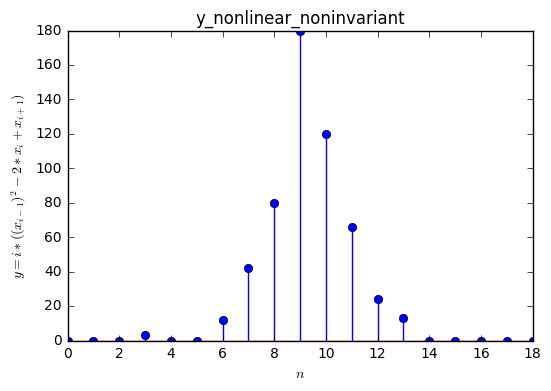


This is so our example


In [117]:
print ('')
print ('')
print ('An example of a non-linear system would be any polynomial equation of order 2 or more')
print ('If we define that it depends on the n (the sample number) too, then it will not be invariant.')
print ('The function chosen is y=i*((x{i-1})^2 - 2*x{i} + x{i+1})')
print ('')
print ('')
y_nonlinear_noninvariant = np.zeros((N,))
for i in range (0,N-1):
    y_nonlinear_noninvariant[i]=(i*(((x_add[i-1])*(x_add[i-1])) - 2*x_add[i] + x_add[i+1]))

plt.figure
plt.stem(y_nonlinear_noninvariant)
plt.title('y_nonlinear_noninvariant')
plt.ylabel('$y=i*((x_{i-1})^2 - 2*x_{i} + x_{i+1})$')
plt.xlabel('$n$')
plt.show()
print ('')
print ('This is so our example')